# NOTE
- The first five row of the table originally obtained from telbib.eso.org
- The affiliations of authors are obtained from NASA ADS
- The countries of the affiliations are interpreted from the affiliations.
- The list of the proposal authors are obtained from ALMA Science Archive.
- The values in the “archive” column are defined by whether any of article authors are included in the proposal authors of the project that is used in the article.
- The values in the “archivedata” columns are the same as in the “arhive” columns, but collapsed.
- The “region” column is a country in which the affiliation of the first author is located.
- See Appendix to see which countries are classified to which region. Note ‘EA’ includs Japan, Taiwan and Korea.


In [216]:
from astroquery.alma import Alma
from astroquery import nasa_ads as na

import urllib
import xml.etree.ElementTree as ET

import pandas as pd

import numpy as np
import re

import matplotlib.pyplot as plt

#df_xml = pd.read_pickle('./df_telbib_alma_aff_archive.pkl')
df_xml = pd.read_pickle('./2019-07-17_telbib_alma_aff_countires_archive.pkl')
df_xml.head()

import seaborn as sns
sns.set(font_scale=1.4,color_codes=True)
#sns.set_style('whitegrid',{'axes.grid' : False})
#sns.set_style('darkgrid')
sns.set_style('dark',{'ytick.left': True})
#sns.despine()
#sns.set_style('ticks')
sns.axes_style()
#sns.set()  ## set back to default
#sns.set_context('paper')  ## thinner lines
sns.set_context('talk')   ## thicker, larger
#sns.set_context('poster') ## thicker, larger
#sns.set_context('notebook')

## Fig.1 
### The number of publications per region between 2012 and 2019

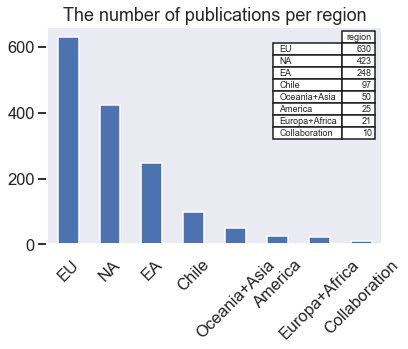

In [230]:
from pandas.plotting import table

fig, ax = plt.subplots(1, 1)

df_xml["region"].value_counts().plot(kind="bar",rot=45,
                                     title='The number of publications per region',
                                     ax=ax)

table(ax,df_xml["region"].value_counts(),
      loc='upper right', colWidths=[0.1, 0.1, 0.1])


## Fig.2
### The fraction of publications per region between 2012 and 2019

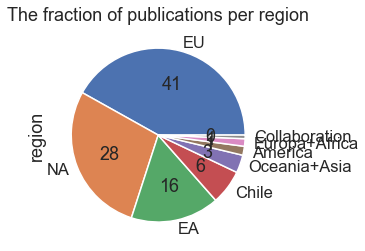

In [218]:
df_xml['region'].value_counts().plot.pie(autopct='%i',title='The fraction of publications per region')

## Table 2
### The number of publications making use of PI and archival data

In [219]:
#for df1['e'] = Series(np.random.randn(sLength), index=df1.index)

df_archive = pd.DataFrame({'All':df_xml['archivedata'].value_counts(),
    'EA':df_xml[df_xml["region"]=='EA']['archivedata'].value_counts(), 
    'NA':df_xml[df_xml["region"]=='NA']['archivedata'].value_counts(),
    'EU':df_xml[df_xml["region"]=='EU']['archivedata'].value_counts(),
    'Chile':df_xml[df_xml["region"]=='Chile']['archivedata'].value_counts()})

df_archive
#.plot(kind="pie")

,All,EA,NA,EU,Chile
PI,1116,178,311,487,78
archive,261,38,70,104,12
PI+archive,127,32,42,39,7


## Fig.3
### The fraction of publications making use of PI and/or archival data 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a292950f0>,
      dtype=object)

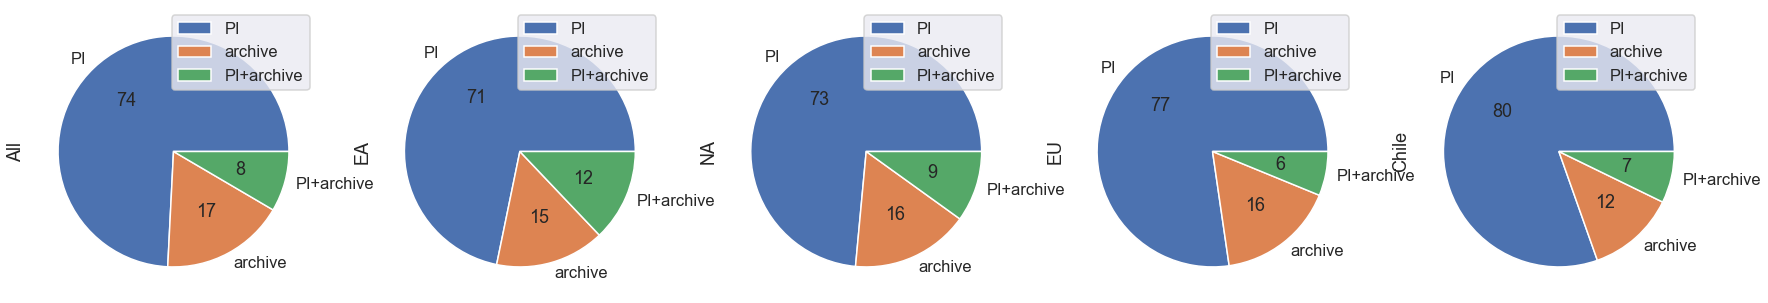

In [220]:
df_archive.plot(kind='pie',subplots=True,figsize=(30,10),autopct='%i')

## Fig.4
### The fraction of publications making use of PI and/or archival data per region.

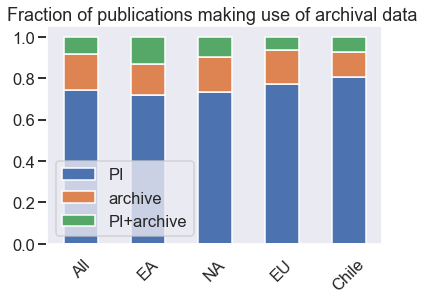

In [221]:
df_archive_transposed = (df_archive/df_archive.sum()).T
#df_archive_transposed
df_archive_transposed.plot.bar(stacked=True,rot=45,title='Fraction of publications making use of archival data ')

## Fig.5
### Evolution of number and fraction of publications making use of PI and/or archival data per region.

In [222]:
def evolutionpub(df,addtitle):
    tmp_dict = {}
    for year in range(2012,2020):
        tmp_dict.update({year:df[df["year"]==str(year)]['archivedata'].value_counts()})
    df_archive = pd.DataFrame(tmp_dict)
    #df_archive.plot(kind='pie',subplots=True,figsize=(30,6),autopct='%i')

    df_archive_transposed = (df_archive/df_archive.sum()).T
    #df_archive_transposed
    df_archive_transposed.plot.bar(stacked=True,rot=45,title='Evolution of fraction of publications {:}'.format(addtitle))

    df_archive_transposed = df_archive.T
    df_archive_transposed.plot.bar(stacked=True,rot=45,title='Evolution of number of publications {:}'.format(addtitle))
    
    print('Table the number of publications', addtitle)
    display(df_archive_transposed)

Table the number of publications All


,PI,PI+archive,archive
2012,6.0,1.0,12.0
2013,45.0,NaN,20.0
2014,77.0,4.0,16.0
2015,96.0,9.0,42.0
2016,164.0,14.0,58.0
2017,269.0,22.0,47.0
2018,295.0,46.0,38.0
2019,164.0,31.0,28.0


Table the number of publications EA


,PI,PI+archive,archive
2012,2.0,1.0,1.0
2013,7.0,NaN,NaN
2014,12.0,3.0,1.0
2015,14.0,2.0,7.0
2016,24.0,8.0,11.0
2017,42.0,5.0,11.0
2018,50.0,7.0,4.0
2019,27.0,6.0,3.0


Table the number of publications EU


,PI,PI+archive,archive
2012,2.0,NaN,6.0
2013,17.0,NaN,7.0
2014,28.0,1.0,8.0
2015,40.0,3.0,15.0
2016,77.0,2.0,24.0
2017,125.0,6.0,18.0
2018,129.0,11.0,15.0
2019,69.0,16.0,11.0


Table the number of publications NA


,PI,PI+archive,archive
2012,2.0,NaN,3.0
2013,17.0,NaN,10.0
2014,29.0,NaN,4.0
2015,29.0,3.0,12.0
2016,47.0,3.0,10.0
2017,71.0,8.0,11.0
2018,81.0,23.0,12.0
2019,35.0,5.0,8.0


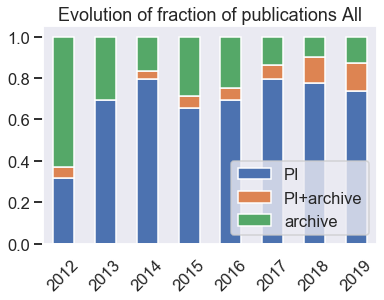

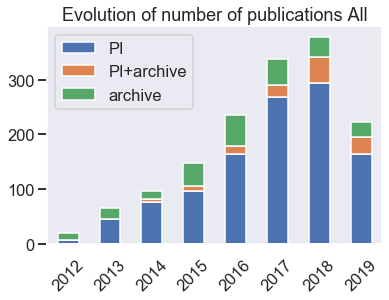

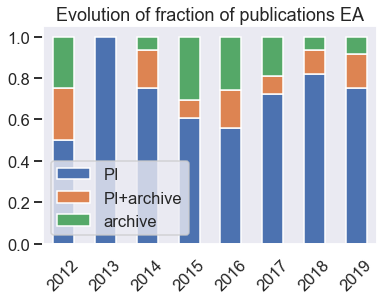

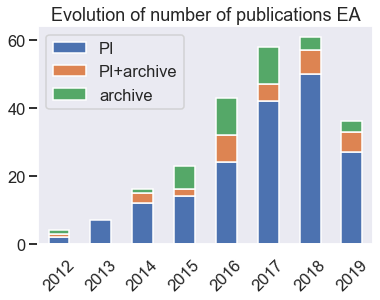

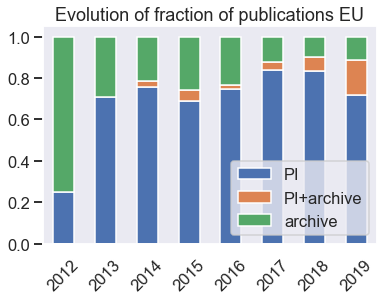

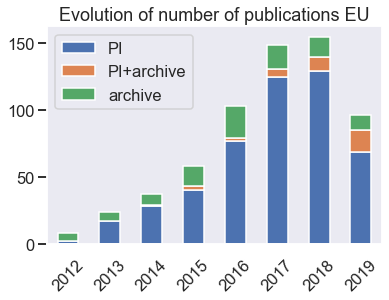

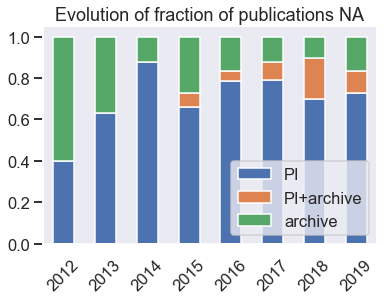

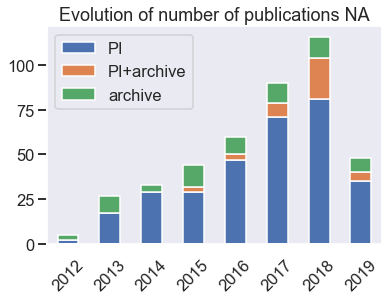

In [223]:
evolutionpub(df_xml,'All')

df_xml_trim = df_xml[df_xml["region"]=='EA']
evolutionpub(df_xml_trim,'EA')

df_xml_trim = df_xml[df_xml["region"]=='EU']
evolutionpub(df_xml_trim,'EU')

df_xml_trim = df_xml[df_xml["region"]=='NA']
evolutionpub(df_xml_trim,'NA')

## Fig.6
### Evolution of number & fraction of publications making use of PI and/or archival data per Asian countries

/Users/rmiura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


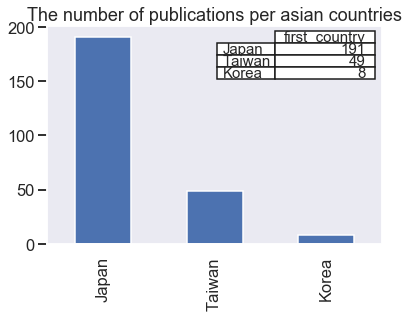

Table the number of publications Taiwan


,PI,PI+archive,archive
2012,1.0,NaN,NaN
2013,NaN,NaN,NaN
2014,2.0,1.0,1.0
2015,2.0,NaN,2.0
2016,3.0,NaN,2.0
2017,10.0,NaN,5.0
2018,9.0,1.0,2.0
2019,6.0,1.0,1.0


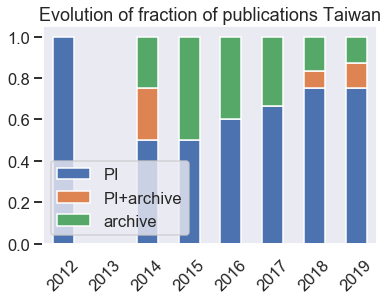

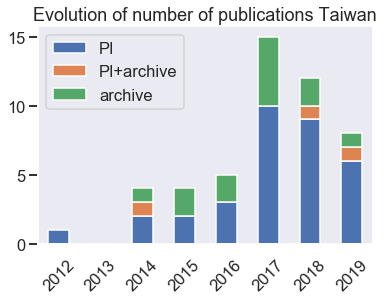

Table the number of publications Korea


,PI
2012,NaN
2013,NaN
2014,NaN
2015,NaN
2016,2.0
2017,2.0
2018,3.0
2019,1.0


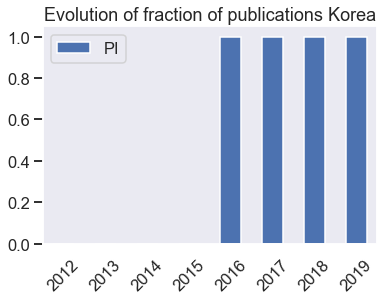

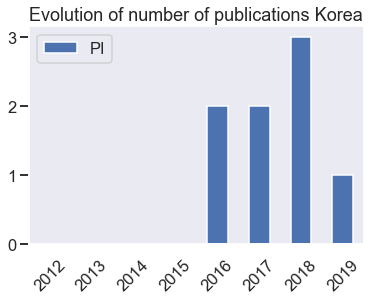

Table the number of publications Japan


,PI,PI+archive,archive
2012,1.0,1.0,1.0
2013,7.0,NaN,NaN
2014,10.0,2.0,NaN
2015,12.0,2.0,5.0
2016,19.0,8.0,9.0
2017,30.0,5.0,6.0
2018,38.0,6.0,2.0
2019,20.0,5.0,2.0


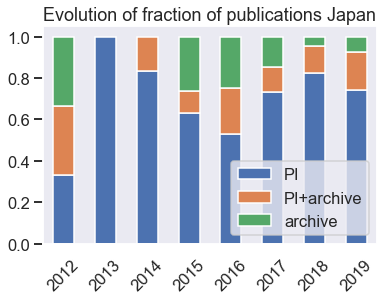

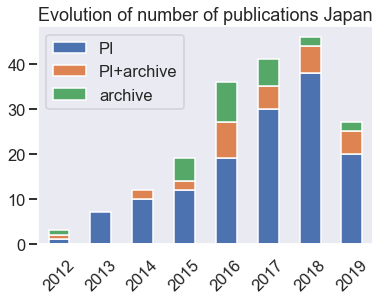

In [224]:
df_region = pd.read_pickle('./df_region.pkl')

regionname = ['EA']

df_ea = df_xml[(df_xml["region"]==regionname[0])]
df_ea['first_country'] = [df_ea.loc[i,'countries'][0] for i in df_ea.index]

fig, ax = plt.subplots(1, 1)

table(ax,df_ea["first_country"].value_counts(),
      loc='upper right', colWidths=[0.3, 0.3, 0.3])

df_ea["first_country"].value_counts().plot(kind="bar",
                                     title='The number of publications per asian countries',
                                     ax=ax)

plt.show()

for country in df_region.index[df_region[0]==regionname[0]]:
    df_ea_trim = df_ea[df_ea['first_country']==country]
    evolutionpub(df_ea_trim,country)
    plt.show()

In [225]:
df_archive_ea = pd.DataFrame({
    'Japan':df_ea[df_ea["first_country"]=='Japan']['archivedata'].value_counts(), 
    'Taiwan':df_ea[df_ea["first_country"]=='Taiwan']['archivedata'].value_counts(),
    'Korea':df_ea[df_ea["first_country"]=='Korea']['archivedata'].value_counts()})


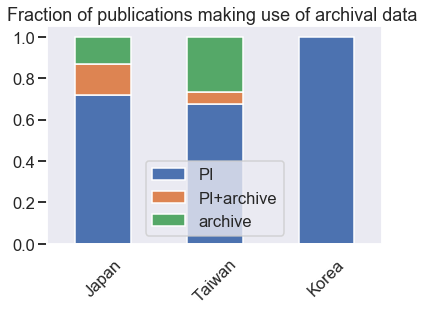

,Japan,Taiwan,Korea
PI,137,33,8.0
PI+archive,29,3,NaN
archive,25,13,NaN


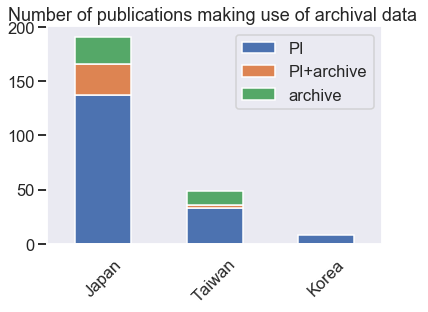

In [226]:
df_archive_transposed_ea = (df_archive_ea/df_archive_ea.sum()).T
df_archive_transposed_ea.plot.bar(stacked=True,rot=45,title='Fraction of publications making use of archival data ')
plt.show()

display(df_archive_ea)

df_archive_transposed_ea = df_archive_ea.T
df_archive_transposed_ea.plot.bar(stacked=True,rot=45,title='Number of publications making use of archival data ')
plt.show()

# Appendix
## A List of countries by regional classification

In [227]:
appendix_df = pd.read_pickle('./df_region.pkl')
print('EA\n',appendix_df.index[appendix_df[0]=='EA'])
print('EU (=ESO)\n',appendix_df.index[appendix_df[0]=='EU'])
print('NA\n',appendix_df.index[appendix_df[0]=='NA'])

EA
 Index(['Taiwan', 'Korea', 'Japan'], dtype='object')
EU (=ESO)
 Index(['Belgium', 'Poland', 'Austria', 'Germany', 'UK', 'Denmark', 'Spain',
       'Netherlands', 'France', 'Portugal', 'Czech Republic', 'Sweden',
       'Switzerland', 'Ireland', 'Italy'],
      dtype='object')
NA
 Index(['Canada', 'USA'], dtype='object')


## The number and fraction of publications per Asian country except EA

/Users/rmiura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


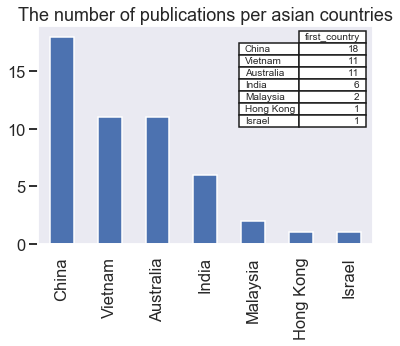

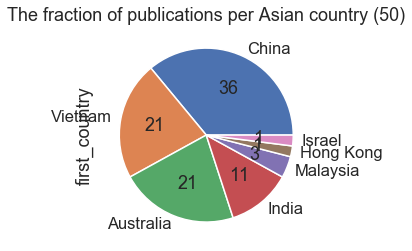

In [228]:


regionname = ['Oceania+Asia']

df_asia = df_xml[(df_xml["region"]==regionname[0]) ]
df_asia['first_country'] = [df_asia.loc[i,'countries'][0] for i in df_asia.index]

#print(df_region.index[df_region[0]==regionname[0]])

fig, ax = plt.subplots(1, 1)

table(ax,df_asia["first_country"].value_counts(),
      loc='upper right', colWidths=[0.2, 0.2, 0.2])

df_asia["first_country"].value_counts().plot(kind="bar",
                                     title='The number of publications per asian countries',
                                     ax=ax,)

plt.show()

#for country in ['China','Vietnam','Australia']:
#    df_asia_trim = df_asia[df_asia['first_country']==country]
#    evolutionpub(df_asia_trim,country)
#    plt.show()

df_asia['first_country'].value_counts().plot.pie(autopct='%i',
    title='The fraction of publications per Asian country ({:})'.format(len(df_asia)))

plt.show()


## The fraction of publications making use of PI/archive data for Asian countries except EA

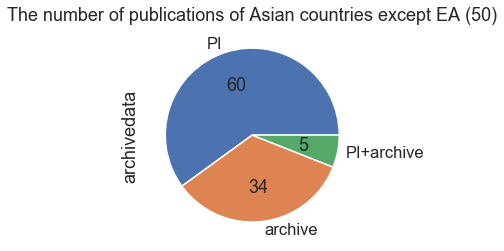

In [229]:
df_asia['archivedata'].value_counts().plot.pie(autopct='%i',
    title='The number of publications of Asian countries except EA ({:})'.format(len(df_asia)))